In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing the dataset
df = pd.read_csv('titanic_train.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# let's see the first ten data points
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# checking the data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### We notice a lot of null values in the data which has to be treated

In [8]:
# checking the shape of the dataset
df.shape

(891, 12)

In [9]:
# statistical decription of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

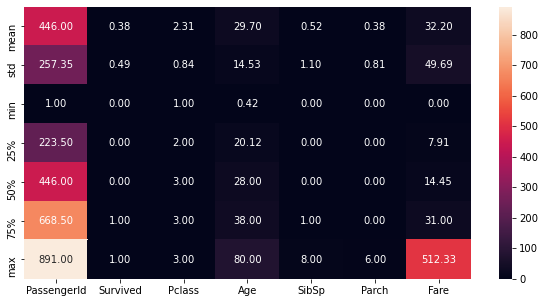

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.describe()[1:],annot=True,fmt='0.2f')

###  looking at the mean and standard deviation accross the various features, we notice a lot of variation which may cause bias when training a machine learning model, this implies that we have the scale the features within a certain range so that all features have almost the same effect on the model training

0    549
1    342
Name: Survived, dtype: int64


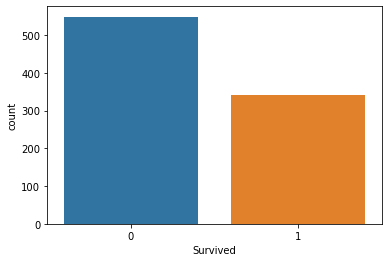

In [11]:
# let's examine the target variable
sns.countplot(x='Survived', data=df)
print(df['Survived'].value_counts())

### We can see that the terget variable contains only two values, which means we could treat our problem as a classification problem

male      577
female    314
Name: Sex, dtype: int64


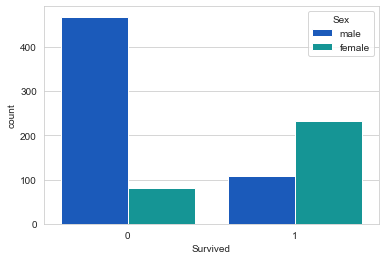

In [51]:
# let's examine the relationship between the dependent and independent variables
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='winter')
print(df['Sex'].value_counts())

### We notice that there are more female survivors than male survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

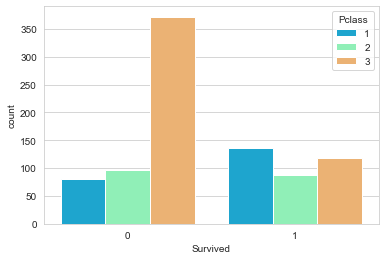

In [26]:
# let's see the survival rates in the various classes
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

### We notice most of the passengers were in class 3, which recorded the highest amount of non-survivors, we can also see that class 1 recorded more survivors than non-survivors and class 2 recorded an almost equal amount of survivors and non-survivors, this indicates that, the higher the class, the better the chances of survival

<AxesSubplot:>

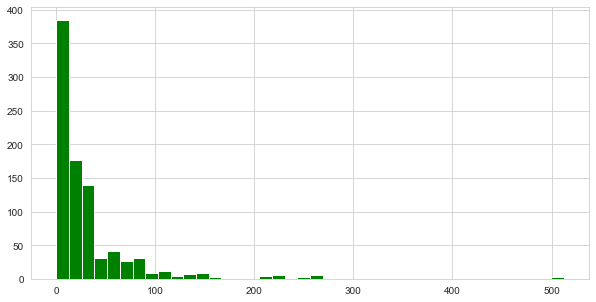

In [55]:
df['Fare'].hist(color='green',bins=40,figsize=(10,5))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

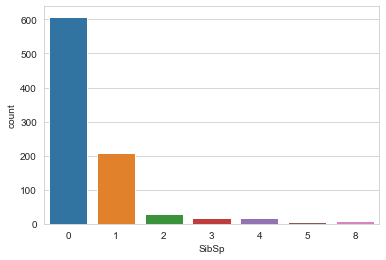

In [52]:
sns.countplot(x='SibSp',data=df)

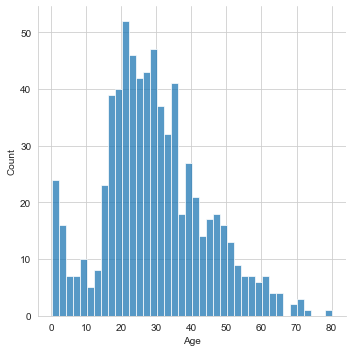

In [43]:
# lets see the age distribution
sns.displot(df['Age'],bins=40,kde=False)

### Data Cleaning

In [56]:
# dropping the cabin column
df.drop('Cabin',axis=1,inplace=True)

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

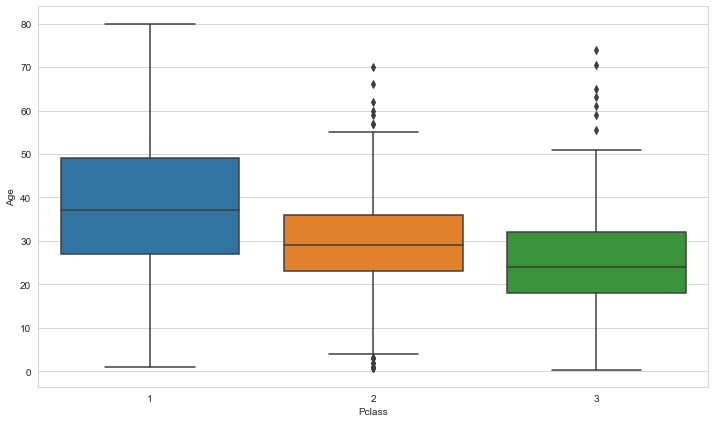

In [59]:
# Let's take a look at the various classes and their age means
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [60]:
# imputing the means of the age column
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1] 
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [61]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [62]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [63]:
# dropping null values in Embarked column
df.dropna(inplace=True)

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [65]:
# encoding the Sex and Embarked columns
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [67]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [69]:
# moving on we will drop Ticket, Name and PassengerId columns since they do not influence the chances of survival
# splitting the data
x = df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y = df['Survived']

In [71]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [100]:
#Create a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train, y_train)

    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(x_train,y_train)

    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

    #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [101]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8171589310829818
[1]K Nearest Neighbor Training Accuracy: 0.8002812939521801
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8016877637130801
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6905766526019691
[4]Gaussian Naive Bayes Training Accuracy: 0.7946554149085795
[5]Decision Tree Classifier Training Accuracy: 0.9859353023909986
[6]Random Forest Classifier Training Accuracy: 0.9690576652601969


In [103]:
for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(x_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()

[[90 12]
 [25 51]]
Model[0] Testing Accuracy = "0.7921348314606742 !"

[[71 31]
 [31 45]]
Model[1] Testing Accuracy = "0.651685393258427 !"

[[82 20]
 [29 47]]
Model[2] Testing Accuracy = "0.7247191011235955 !"

[[93  9]
 [51 25]]
Model[3] Testing Accuracy = "0.6629213483146067 !"

[[84 18]
 [23 53]]
Model[4] Testing Accuracy = "0.7696629213483146 !"

[[81 21]
 [26 50]]
Model[5] Testing Accuracy = "0.7359550561797753 !"

[[87 15]
 [27 49]]
Model[6] Testing Accuracy = "0.7640449438202247 !"



In [105]:
# training the best model
best_model = LogisticRegression(random_state=0)
best_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
#saving the best model
import pickle
pickle.dump(best_model,open('log.pkl'))